# CS 5262-51 Week 3 Exercise (Wed 5/25/2022)
# Author: Dana Zhang
# PART I: Understanding the Data

This part of the notebook demonstrates a subset of basic plots and techniques to perform an initial exploratory data analysis (EDA) using DS Python packages. You will also have an opportunity to apply some of the methods and functions introduced in the lecture videos from this week. 

## Problem Formulation

In this example, we will be using the planets sample dataset from seaborn: https://github.com/mwaskom/seaborn-data/blob/master/planets.csv

The dataset provides information on planets that astronomers have discovered around other stars, which are known as extrasolar planets, or exoplanets for short. We will first use data science Python packages to explore and understand the data. After that, we will build a model to predict method used to detect an exoplanet

In [ ]:
# tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

We have two options here: 1) load the raw data from its online repository into a pandas dataframe or 2) load the dataset from seaborn since it's one of the available examples in seaborn - it is auto-loaded as a pandas dataframe

**Data dictionary**
- method: how the planet was detected
- orbital period: how long (days) it takes to complete one cycle of rotation around its center (NaN values mean that an exoplanet is too far away from a star to detect where the orbit begins)
- mass: relative weight of the exoplanet
- distance: light-years from Earth (a light-year is a distance that it takes light a year to travel)
- year: discovery year

In [ ]:
# planets = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv')
planets = sns.load_dataset('planets')

display(planets.tail(5))
planets.info()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


## Exploratory Data Analysis

In [ ]:
planets['number'].value_counts()

1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: number, dtype: int64

In [ ]:
planets.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd4ea427290>,
 [Text(-0.11830129205749786, 1.0936200456728684, 'Radial Velocity'),
  Text(-0.164654128432814, -1.0876070145001964, 'Transit'),
  Text(1.0128811168341587, -0.4290359462338647, 'Imaging'),
  Text(1.0745541084188555, -0.23523066993944275, 'Microlensing'),
  Text(1.0923015172455681, -0.12991303022803344, 'Eclipse Timing Variations'),
  Text(1.096834403394604, -0.08339239491706323, 'Pulsar Timing'),
  Text(1.0987030004255312, -0.05340146866833797, 'Transit Timing Variations'),
  Text(1.0995895635135577, -0.030046494172592007, 'Orbital Brightness Modulation'),
  Text(1.0999189206313742, -0.013355449715856666, 'Astrometry'),
  Text(1.0999949319911002, -0.0033391007613810027, 'Pulsation Timing Variations')])

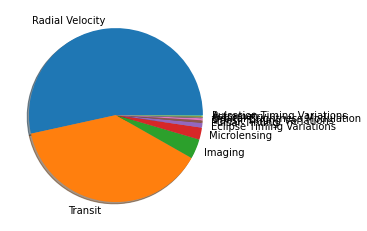

In [ ]:
# Creating a pie chart to visualize porportions of the detection methods in this data
methods_counts = planets['method'].value_counts()
display(methods_counts)

plt.pie(methods_counts, labels=methods_counts.index, shadow = True)

### Taking a pause: what do we notice from the pie chart and how might that affect our next step(s)?

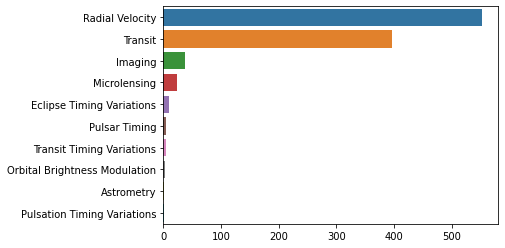

In [ ]:
# Alternatively, we can create a barplot to visualize the various methods available in the data
sns.barplot(y=methods_counts.index, x=methods_counts.values, orient='h')
# plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


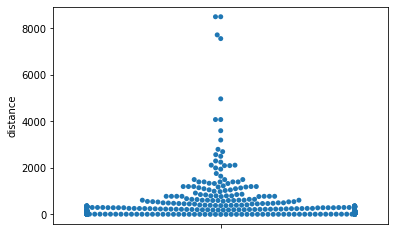

In [ ]:
# Visualizing distributions
sns.swarmplot(y='distance', data=planets) # s=1

In [ ]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


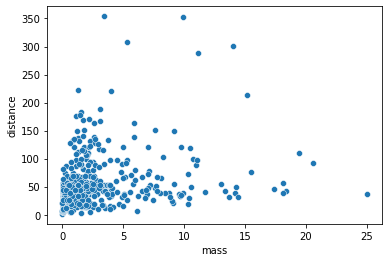

In [ ]:
# Examine relationships between variables
sns.scatterplot(x=planets['mass'], y=planets['distance'])

### Taking a pause: ideas for feature engineering on distance?

In [ ]:
# Use groupby to get an idea of the average distance each detection method is sensitive to.
planets.groupby('method')['distance'].mean()

method
Astrometry                         17.875000
Eclipse Timing Variations         315.360000
Imaging                            67.715937
Microlensing                     4144.000000
Orbital Brightness Modulation    1180.000000
Pulsar Timing                    1200.000000
Pulsation Timing Variations              NaN
Radial Velocity                    51.600208
Transit                           599.298080
Transit Timing Variations        1104.333333
Name: distance, dtype: float64

## Exercise

Begin the exercise with one member sharing their screen with this notebook open. Work through the questions with your team and discuss how some of the outputs may help inform the next steps in 

In [1]:
# Question 1 - What is the relationship between mass and orbital periods? (Hint: use visualization to find out)



In [2]:
# Question 2 - What are top 2 most used methods for exoplanet detection?



In [3]:
# Question 3 - What was the earliest planet discovery by each of the available detection methods?




In [4]:
# Question 4 - How would you perform feature engineering on the method column? Print 5 sample rows to examine the engineered method column
# (Hint: use .apply())



# TODO: Don't forget to drop the original method column if you created a new column


In [5]:
# Question 5 - let's revisit the class distribution in our target variable, method (the one with three classes now)
# Draw a pie chart to visualize the target variable below




# What's a potential problem here? (Note: we will not worry about this for now, but as you will soon see, the predictive model's performance reflects this problem!)


In [ ]:
# Question 6 - there are a lot of missing values in the dataset, and one way to deal with that is to drop the rows with missing values
# TODO: Your code here
planets_dropped_missing = planets.???
# END OF TODO
print('# of rows of original dataframe: ', len(planets))
print('# of rows of new dataframe after dropping missing data: ', len(planets_dropped_missing))

In [ ]:
# Question 7 - pandas does have the fillna() method for filling missing data with values, as shown in the example code below. 
# What is the danger of using the fillna() method here? What should you do instead to impute missing values?
planets_filled = planets.copy()
planets_filled[['orbital_period', 'mass', 'distance']] = planets_filled[['orbital_period', 'mass', 'distance']].fillna(planets_filled[['orbital_period', 'mass', 'distance']].median())
planets_filled.describe()



,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,1.785507,1921.365579,1.943088,218.270271,2009.070531
std,1.240976,25471.074254,2.774105,653.407624,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.747860,1.260000,38.010000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,487.100000,1.260000,130.720000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


# Part II: Setting up an ML Pipeline

In this part, you'll put together a pipeline for predicting the method of detection with your team. 

Follow the instructions in the TODO comments to replace the '???' with appropriate Python code to complete each numbered prompts

In [ ]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Train-test split

We will *NOT* leave a hold-out test set due to the small size of our dataset, but it is good practice to have one for a final test run before deploying the model to a production environment

In [ ]:
class_column = ['method']
random_seed = 1234

# 1 - TODO: how would you like to split your data? 
# i.e., together with your team decide 1) whether to use planets_dropped_missing or the modified planets dataframe and 2) what is the % split
X_train, X_test, y_train, y_test = train_test_split(planets.drop(columns=???), planets[???],
                                                   test_size=???, random_state=random_seed, stratify=planets[???])

Quick sanity check to make sure that everything seems correct:

In [ ]:
# X Train
print('On X train: ')
print('X train dimensions: ', X_train.shape)
display(X_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', X_test.shape)
display(X_test.head())

On X train: 
X train dimensions:  (776, 5)


,number,orbital_period,mass,distance,year
422,1,3630.000000,9.610,36.36,2012
413,1,122.100000,0.050,9.24,2010
1006,1,4.465633,NaN,330.00,2012
169,1,2.875317,NaN,70.00,2010
352,3,8.667000,0.033,12.58,2006



On X test: 
X test dimensions:  (259, 5)


,number,orbital_period,mass,distance,year
753,2,38.558304,NaN,NaN,2012
528,1,6.403000,0.23,43.12,2002
261,1,500.000000,1.07,27.13,2002
227,1,1634.000000,14.20,38.26,2009
1,1,874.774000,2.21,56.95,2008


In [ ]:
# X Train
print('On y train: ')
print('y train dimensions: ', y_train.shape)
display(y_train.head())

# X test
print('\nOn y test: ')
print('y test dimensions: ', y_test.shape)
display(y_test.head())

On y train: 
y train dimensions:  (776, 1)


,method
422,Radial Velocity
413,Radial Velocity
1006,Transit
169,Transit
352,Radial Velocity



On y test: 
y test dimensions:  (259, 1)


,method
753,Transit
528,Radial Velocity
261,Radial Velocity
227,Radial Velocity
1,Radial Velocity


## Establish the training pipeline


In [ ]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
# 2 - we need to build two separate pipes, one for handling numeric data and the other for categorical data
# TODO: discuss with your team which strategies you would like to use for each imputer pipe
# Hint: Check out available strategies here: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='???')),
                               ('onehot_cat', OneHotEncoder())])

num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy='???')),
                               ('scale_num', StandardScaler())])

In [ ]:
# 3 - now we establish preprocessing pipe by columns
# TODO: discuss with your team which columns should be in cat_cols vs num_cols

cat_cols = [???]
num_cols = [???]

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, cat_cols),
                             ('num_pipe', num_pipeline, num_cols)],
                             remainder='passthrough')

In [ ]:
# 4 - generate the entire training pipeline with preprocessing and modeling
# TODO: Use the LogisticRegression model and choose its initial parameters
# I used penalty='elasticnet', solver='saga', tol=0.01, but you are welcome to try other parameters
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='???', solver='???', tol=???))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

## Cross-validation with hyperparameter tuning


In [ ]:
# 5 - we will use the pipeline for cross validation and hyperparameter tuning
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }
# TODO: choose your cv folds
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = ???, return_train_score=True)

In [ ]:
tuning_grid

In [ ]:
# 6 - now we will feed the training set to our training pipeline
# TODO (last one!): hover over the fit() method below and open the documentation tab. Replace the ???s with the correct variables
# if your code produces a warning message about 1d array, then use ravel() as suggested
grid_search.fit(???, ???)

In [ ]:
print(grid_search.best_score_)
grid_search.best_params_

0.8324317617866004


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## Final fit

The final fit here is already present in the generated model due to the way we set our parameters in the grid search. If we want to look at the performance, we can do so. Here is a non-helpful description of the best model:

In [ ]:
grid_search.best_estimator_

## Variable importance *

Now we assess the importance in the selected model to reveal any potential insights.

In [ ]:
# Printing our target classes
grid_search.classes_

In [ ]:
# Get the weights of our features used in the best model (estimator)
coefs = grid_search.best_estimator_['mdl'].coef_[0]
coefs

In [ ]:
grid_search.best_estimator_.named_steps['preproc'].transformers_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


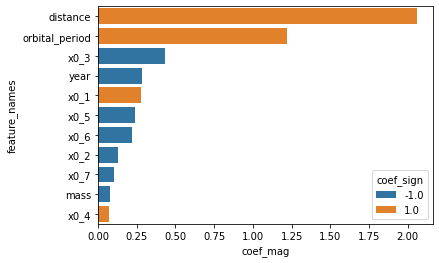

In [ ]:
# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[0][1].named_steps['onehot_cat'].get_feature_names()

# get back the numerical features - recall that index 1 was the num_pipe
num_names = grid_search.best_estimator_.named_steps['preproc'].transformers_[1][2]

# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([cat_names, num_names]), 'feature_imp': coefs})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['feature_imp']),
                             coef_sign = np.sign(coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot! 
coef_info = coef_info.set_index('feature_names').sort_values(by='coef_mag', ascending=False)
sns.barplot(y=coef_info.index, x='coef_mag', hue='coef_sign', data=coef_info, orient='h', dodge=False);

## Performance metrics on test data


Here, we can see the performance of the model, which is pretty good, at least for Radial Velocity and Transit! We can also look into different scores specifically for more insight into the performance.

In [ ]:
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

                 precision    recall  f1-score   support

          Other       0.57      0.19      0.29        21
Radial Velocity       0.87      0.96      0.91       139
        Transit       0.87      0.87      0.87        99

       accuracy                           0.86       259
      macro avg       0.77      0.67      0.69       259
   weighted avg       0.84      0.86      0.84       259



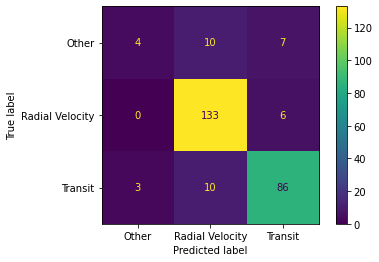

In [ ]:
cm = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid_search.classes_)
disp.plot()

plt.show()

## Hope you had fun! Solution to this notebook will be available on Brightspace under Week 3 after class